# Feuille de TP3 - Partie B : Tracé de fonctions

# Feuille de TP3 - Partie B : Tracé de fonctions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

On redonne l'exemple de graphique suivant avec les principales commandes.

La courbe consiste à "relier" les points de coordonnées $(x[i],y[i])$ ; sur l'exemple ci-dessous, il n'y pas assez de points donc la courbe n'est pas assez arrondie. Si l'on prend plus de points, on reconnaît mieux la fonction racine carrée :

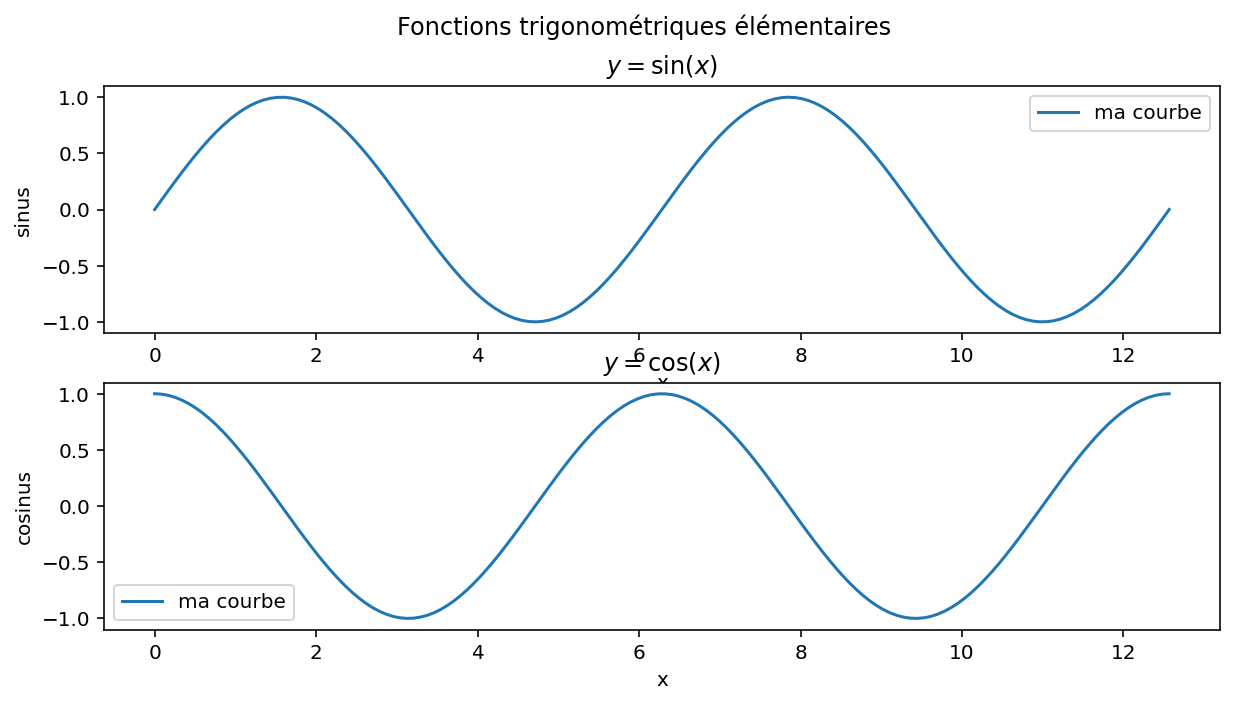

In [5]:
def f(x):
    return np.sin(x)

def g(x):
    return np.cos(x)
    
def test_plot():
    s =0.
    e = 4.*np.pi
    x = np.linspace(s, e, 150)
    y = f(x)
    fig, ax = plt.subplots(2, 1, figsize=(10,5))
    ax[0].plot(x, y, label="ma courbe")
    ax[0].set_title(r'$y=\sin(x)$')
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("sinus")
    ax[0].legend()
    
    ax[1].plot(x, g(x), label="ma courbe")
    ax[1].set_title(r'$y=\cos(x)$')
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("cosinus")
    ax[1].legend()
    
    fig.suptitle("Fonctions trigonométriques élémentaires")
    #fig.show() # Inutile dans les notebooks uniquement.

test_plot()

# Exercice 1 : Tracé de fonctions usuelles

## Question 1
En remarquant que la fonction `subplots` prend en argument un nombre de ligne puis un nombre de colonne (et enfin, en argument optionnel, la taille de la figure), créer une figure avec une ligne et deux colonnes puis représenter sur 2 graphes côte à côte les fonctions suivantes :
* sur le graphe de gauche, $t \mapsto \sin(\omega_1 t +\pi)$, $t \mapsto \sin(\omega_2 t)$ puis leur somme,
* sur le graphe de droite, $t \mapsto 0.8 \sin(\omega_1 t +\pi)$, $t \mapsto 2 \sin(\omega_2 t)$ puis leur somme,

avec $\omega_1 = 1$, $\omega_2 = 1.1$ et pour $t \in [0,30\pi]$.

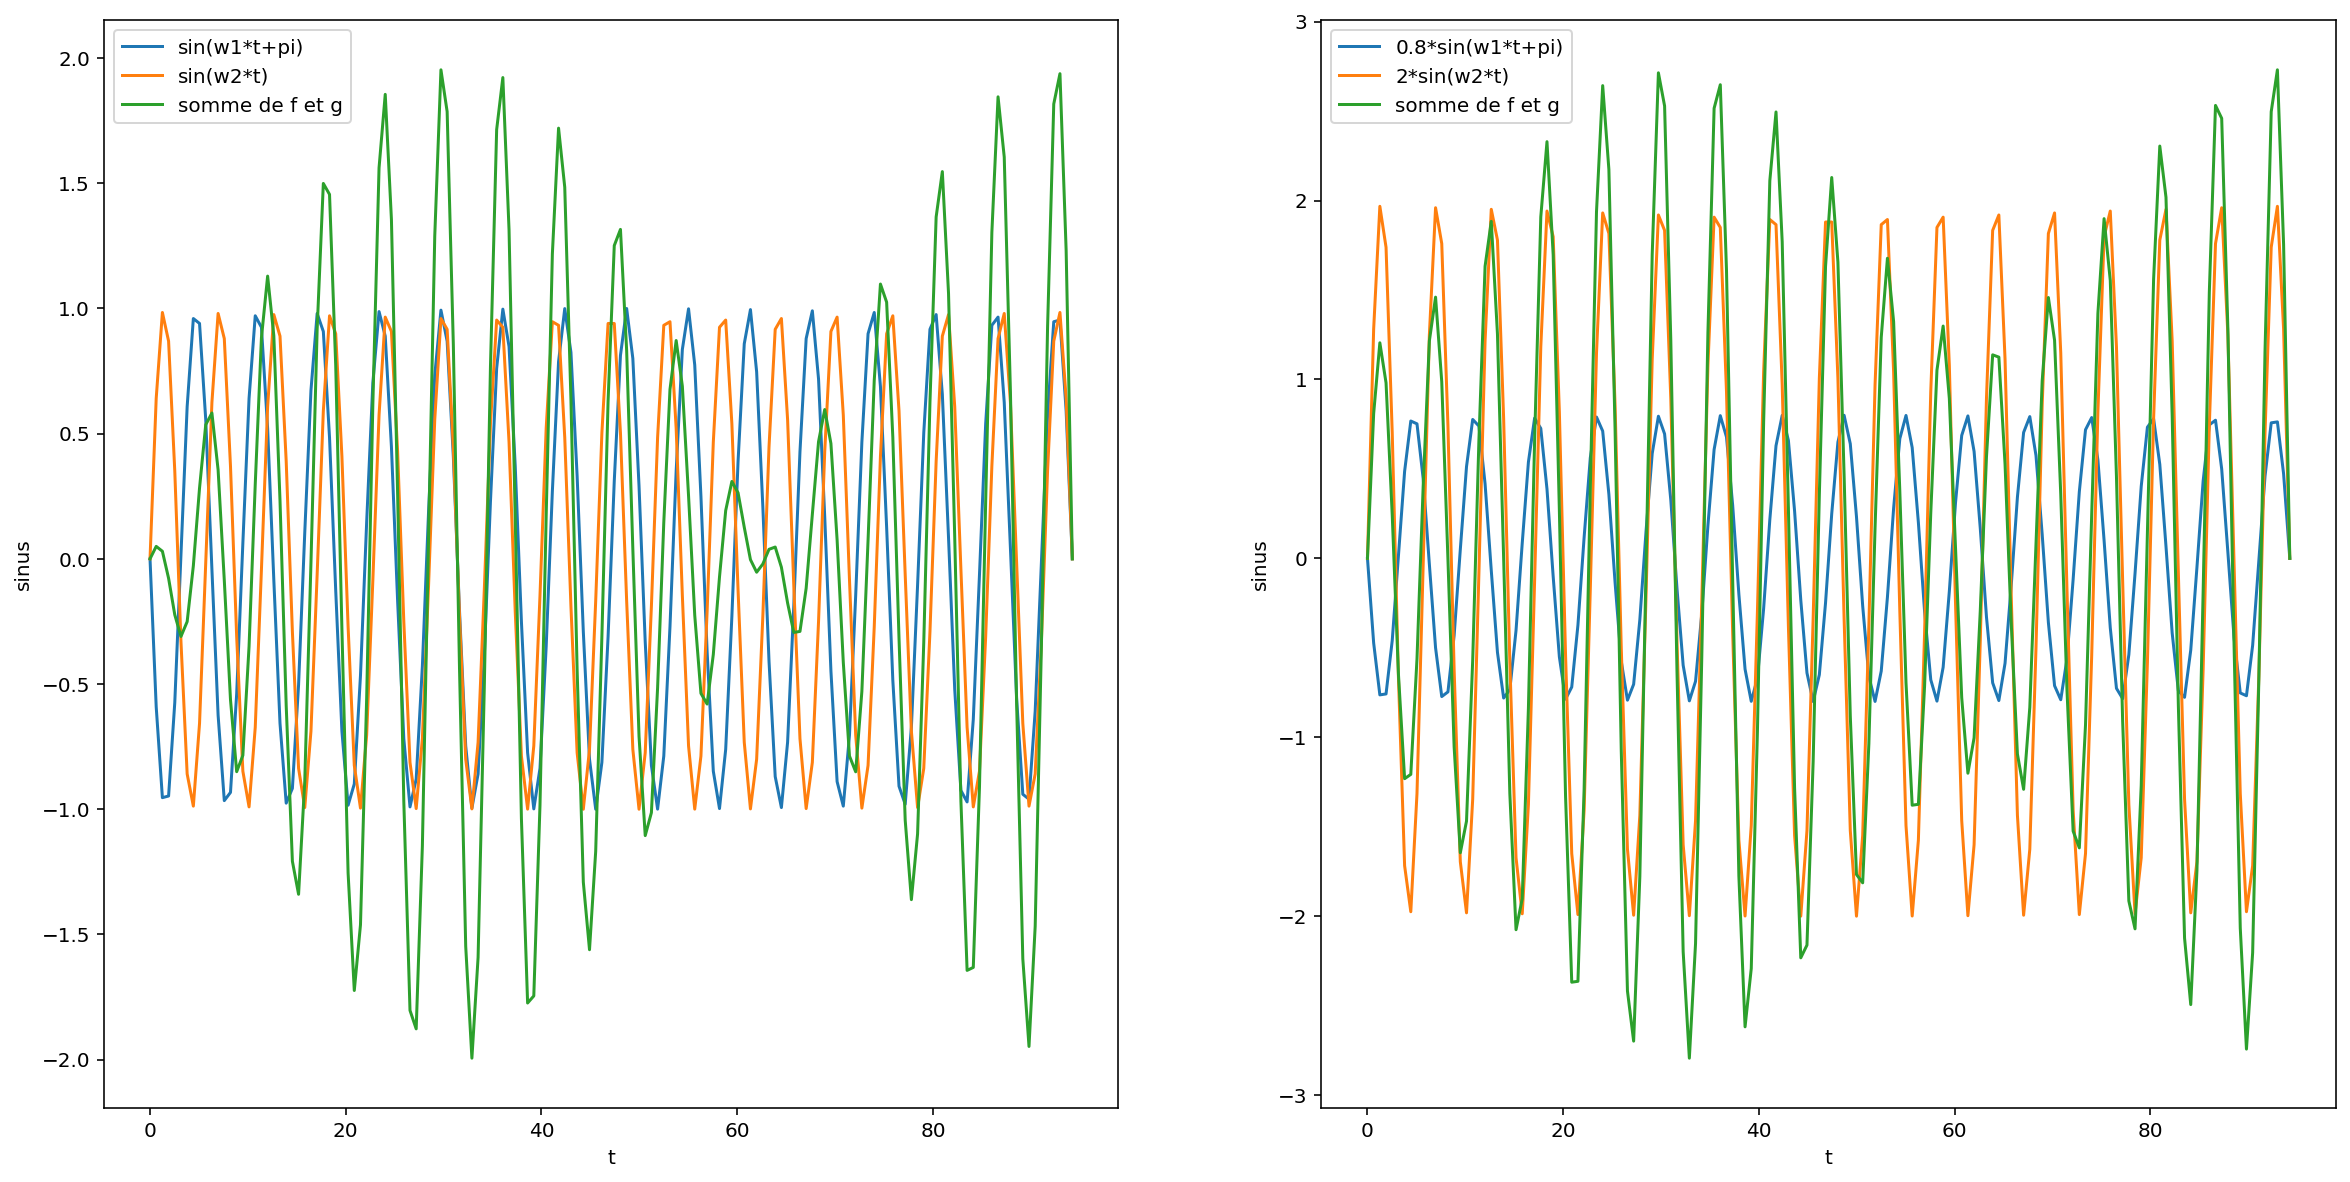

In [29]:
w1 = 1
w2 = 1.1

def f(t):
    return np.sin(w1*t+np.pi)

def g(t):
    return np.sin(w2*t)

    
def test_plot():
    t = np.linspace(0, 30*np.pi , 150)
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    ax[0].plot(t, f(t), label="sin(w1*t+pi)")
    ax[0].plot(t, g(t), label="sin(w2*t)")
    ax[0].plot(t, f(t)+g(t), label="somme de f et g")
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("sinus")
    ax[0].legend()
    
    ax[1].plot(t, 0.8*f(t), label="0.8*sin(w1*t+pi)")
    ax[1].plot(t, 2*g(t), label="2*sin(w2*t)")
    ax[1].plot(t, 0.8*f(t)+2*g(t), label="somme de f et g")
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("sinus")
    ax[1].legend()
    
    
test_plot()

# Exercice 2 : Courbes paramétrées
 Nous allons représenter des courbes paramétrées, c'est-à dire des courbes pour
lesquelles les cordonnées $x$ et $y$ sont obtenues à partir d'un paramètre qui varie.

## B.A.BA
Pour tracer une courbe paramétrée $x(t),y(t)$, il suffit de définir correctement les tableaux `x` et `y` de façon à ce que `x[i]` et `y[i]` soient les coordonnées de la courbe à l'instant `t[i]`.

### Question
1. Pour $t\in [0;2\pi]$, tracer la courbe paramétrée :
\begin{equation}
\left\{
\begin{aligned}
x(t) &= \sin^3 (t) \\
y(t) &= \cos(t) - \cos^4 (t)
\end{aligned}
\right.
\end{equation}
2. Tracer la courbe de Lissajou suivante :
\begin{equation}
\left\{
\begin{aligned}
x(t) &= \sin(5t) \\
y(t) &= \sin(3t +\pi)
\end{aligned}
\right.
\end{equation}




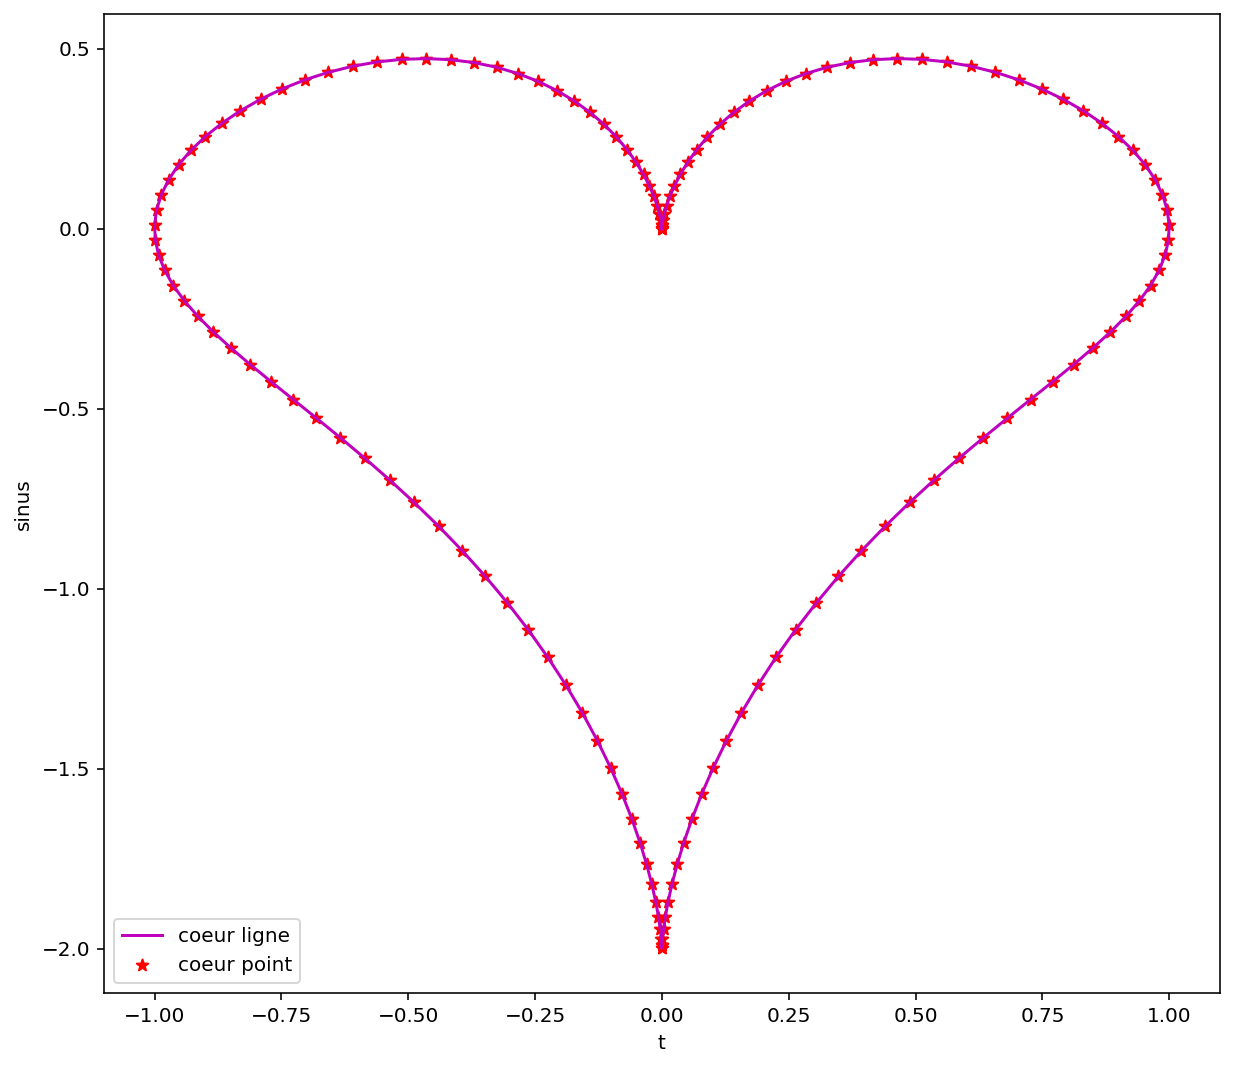

In [66]:
def x(t):
    return np.sin(t)**3

def y(t):
    return np.cos(t)-np.cos(t)**4
    
def test_plot():
    t = np.linspace(0, 2*np.pi , 150)
    fig, ax = plt.subplots(1, 1, figsize=(10,9))
    ax.plot(x(t), y(t), label="coeur ligne", color = 'm')
    ax.scatter(x(t), y(t), label="coeur point", marker = '*', color = 'r')
    ax.set_xlabel("t")
    ax.set_ylabel("sinus")
    ax.legend()
    
test_plot()

## Paramétrisation polaire
Cette paramétrisation consiste à repérer un point en fonction d'un angle (le zéro correspondant à l'axe des abscisse) et d'un rayon (distance à l'origine de l'axe), par exemple l'angle $\theta$ pour un cercle $x = rcos(\theta)$, $y = rsin(\theta)$.
Matplotlib fournit _nativement_ des outils pour tracer des courbes en coordonnées polaires.

Pour pouvoir définir une courbe à l'aide des coordonnées polaires, il faut utiliser la projection polaire : `projection='polar'`. En voici deux exemples :

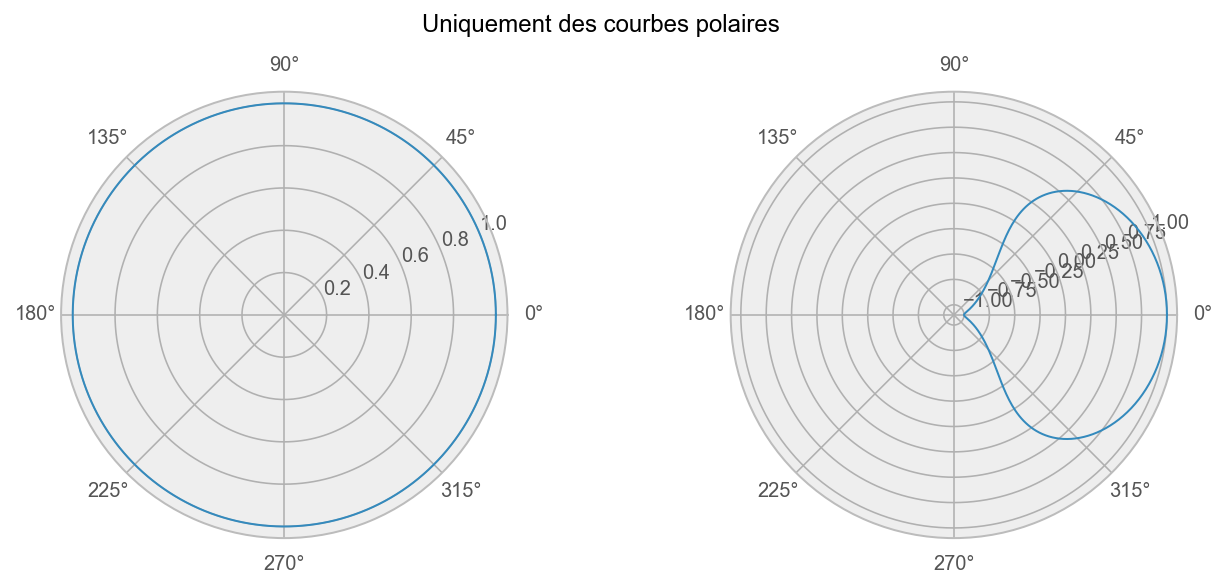

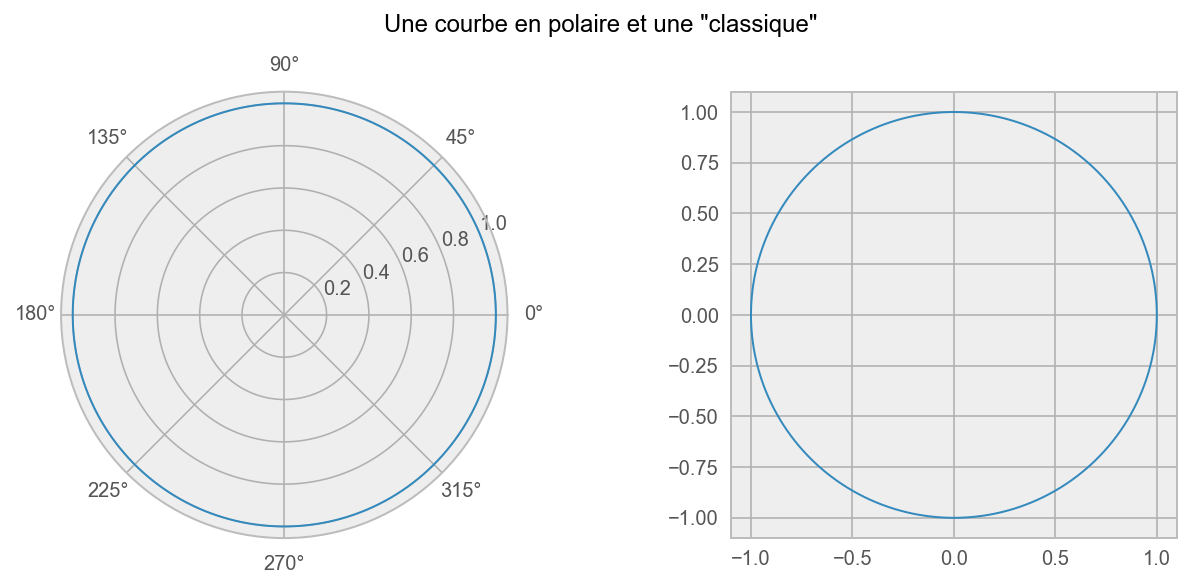

In [22]:
t = np.linspace(0, 2.*np.pi, 200)

# Exemple 1 : uniquement des polaires
fig, ax = plt.subplots(1, 2, figsize=(10,5), subplot_kw=dict(projection='polar'))
ax[0].plot(t, np.ones(t.shape))
ax[1].plot(np.sin(t), np.cos(t))
fig.subplots_adjust(top=1, wspace=.5) # Pour ajuster l'espacement (wspace pour horizontal, hspace pour vertical)
fig.suptitle("Uniquement des courbes polaires")

# Exemple 2 : mélange
fig2 = plt.figure(figsize=(10,5))
ax0 = fig2.add_subplot(121, projection='polar')
ax1 = fig2.add_subplot(122, aspect='equal')
ax0.plot(t, np.ones(t.shape))
ax1.plot(np.sin(t), np.cos(t))
fig2.subplots_adjust(top=1, wspace=0.5) # Pour ajuster l'espacement (wspace pour horizontal, hspace pour vertical)
fig2.suptitle('Une courbe en polaire et une "classique"');


Nous allons tracer des spirales. On peut définir des spirales avec $x =r cos(\theta)$, $y = r sin(\theta)$, mais avec un rayon $r$ qui dépend de l'angle $\theta$. Pour la
spirale logarithmique, on a la loi $r = a^\theta$, et pour la spirale d'Archimède, on a $r = a\theta$, où $a$ est un paramètre fixe, par exemple $1.3$.

|Spirale logarithmique | Spirale archimèdienne|
|---------------|----------------|
|<img src="log_spi.png" width="50%">| <img src="arc_spi.png" width="60%">|


### Question 
A l'aide de la fonction `subplots`, scindez la fenêtre graphique en 2, tracer les deux spirales côte à côtes. Donner à votre graphique titres, labels et légendes.

In [69]:
# Mettre votre code ici


# Exercice 3 : fonctions de X et de Y

Exécuter les commandes suivantes :

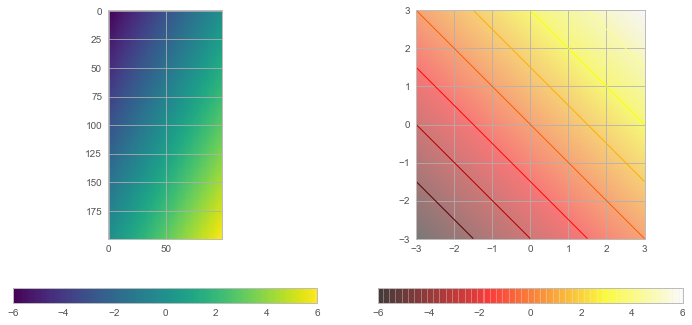

In [8]:
# Import des modules
import numpy as np
import matplotlib.pyplot as plt

# Définition du domaine
x0 = y0 = -3
x1 = y1 = 3

# Création des tableaux 2D contenant les coordonnées X et Y de chaque point (maillage)
x = np.linspace(x0, x1, 100)
y = np.linspace(y0, y1, 200)
X, Y = np.meshgrid(x, y)

# Graphe de la fonction - premier test
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
im0 = axes[0].imshow(X+Y)
# Graphe de la fonction - version plus élaborée
im1 = axes[1].imshow(X+Y, extent =(x0, x1, y0, y1), origin='lower', cmap='hot', alpha=0.5)
axes[1].contour(X, Y, X+Y, origin='lower', cmap='hot')
fig.colorbar(im0, ax=axes[0], orientation='horizontal')
fig.colorbar(im1, ax=axes[1], orientation='horizontal');

### Question 2
En s'inspirant de la fonction précédente, représenter la fonction $X^2 - 2Y^2$ sur le domaine $[-1;1]\times [-2;2]$.

### Question 3
Tester la commande `contour` (pour la documentation, utiliser `?plt.contour` mais préférer `ax.contour` pour l'exécuter).

In [6]:
?plt.contour

Signature: plt.contour(*args, data=None, **kwargs)
Docstring:
Plot contour lines.

Call signature::

    contour([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == M`` is the number of columns in *Z* and
    ``len(Y) == N`` is the number of rows in *Z*.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(M)``, ``Y = range(N)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.

levels : int or array-like, optional
    Determines the number and positions of the contour lines / regions.

    If an int *n*, use `~matplotlib.ticker.MaxNLocator`, w